In [1]:
# Change here using YOUR own first and last names
fn1 = "Augustin"
ln1 = "Curinier"
filename = (
    "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
)
print(filename)

sd-tsia204_lab2_curinier_augustin.ipynb


In [2]:
import random

import autopep8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stat
import seaborn as sb
import sklearn as sk
import sklearn.model_selection
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [3]:
plt.style.use("ggplot")

# 1) Preprocess the data:

## a) Set the random seed to 0.

In [4]:
random.seed(0)
random.random()

0.8444218515250481

## b) Load the data. Print the mean and standard deviation of every covariate. Is the data centered? normalized? standardized?

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
# We use pandas to visualize the data stored in csv format
df = pd.read_csv("meatspec.csv")

In [7]:
# Quick statistical overview of the data, looking at mean and std for each covariate
data_description = df.describe()

# displaying mean and std for every covariate
data_description.iloc[[1, 2]]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,2.839957,2.844390,2.849152,2.854288,2.859844,2.865844,2.872291,2.879244,2.886728,2.894691,2.902986,2.911358,2.919562,2.927454,2.935059,2.942558,2.950275,2.958583,2.967758,2.977881,2.988772,3.000071,3.011461,3.022919,3.034826,3.047814,3.062523,3.078830,3.096211,3.113879,3.130891,3.146409,3.160014,3.171948,3.183190,3.195273,3.209969,3.229324,3.254360,3.285806,3.323817,3.367577,3.414949,3.462492,3.506207,3.542778,3.570628,3.590259,3.603489,3.612217,3.617985,3.621690,3.623647,3.623836,3.622136,3.618438,3.612758,3.605205,3.595975,3.585247,3.573175,3.559896,3.545537,3.530208,3.513990,3.496981,3.479365,3.461379,3.443216,3.424906,3.406406,3.387609,3.368399,3.348625,3.328123,3.306856,3.284976,3.262852,3.240918,3.219482,3.198627,3.178262,3.158254,3.138534,3.119104,3.099971,3.08107,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,0.436906,0.439653,0.442446,0.445303,0.448239,0.451257,0.454356,0.457546,0.460843,0.464272,0.467797,0.471355,0.474864,0.478260,0.481541,0.484774,0.488073,0.491629,0.495564,0.499945,0.504694,0.509635,0.514550,0.519277,0.523824,0.528329,0.532875,0.537384,0.541553,0.544953,0.547071,0.547488,0.546067,0.543051,0.539009,0.534691,0.530815,0.527899,0.526103,0.525422,0.525806,0.527147,0.529258,0.531843,0.534567,0.537113,0.539249,0.540874,0.542105,0.542989,0.543699,0.544263,0.544765,0.545177,0.545499,0.545687,0.545771,0.545746,0.545690,0.545600,0.545468,0.545309,0.545167,0.545045,0.544887,0.544649,0.544448,0.544290,0.544269,0.544326,0.544481,0.544677,0.544868,0.544988,0.544925,0.544640,0.544125,0.543489,0.542884,0.542428,0.542146,0.541957,0.541776,0.541519,0.541135,0.540563,0.53973,0.538586,0.537108,0.535354,12.740297


The means of the covariates are different from 0, hence we can say that the data is *not centered*, they take values outside of
$[0,1]$ so they are *not normalized* either. Finally, in addition to having a mean different from 0, the standard deviation
is not equal to 1, hence it is *not standardized*.

## c) Separate the data in train and test sets. Save 1/4 of the data for testing, and standardize both train and test sets.

In [8]:
# First creating the covariate matrix X and the target vector Y
X = df.drop(["fat"], axis=1).values
Y = df["fat"].values

In [9]:
# n = 215 rows, p = 100 columns/covariates
print(X.shape)
print(Y.shape)

(215, 100)
(215,)


In [10]:
# We use train_test_split from sklearn.model_selection to do the split, 25% of data used for testing
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(
    X, Y, test_size=0.25, random_state=0)

In [11]:
# Quick dimension checks: now n=161 rows for the test set that we'll work with
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(161, 100)
(54, 100)
(161,)
(54,)


In [12]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit StandardScaler on the test data, then transform the covariates matrices of both sets
X_train_scaled = scaler.fit_transform(X_train)
# we are not supposed to know the mean and std for the test data, that is why we transform it according to the mean and std
# we computed previously with train dataset
X_test_scaled = scaler.transform(X_test)

# same thing with y, the outcome we want to predict
Y_train_scaled = scaler.fit_transform(Y_train.reshape(-1, 1))
Y_test_scaled = scaler.transform(Y_test.reshape(-1, 1))

Problem of shape for Y:

In [13]:
Y_train_scaled.shape

(161, 1)

In [14]:
Y_train_scaled[:, 0].shape

(161,)

Quick fix 

In [15]:
Y_train_scaled = Y_train_scaled[:, 0]
Y_test_scaled = Y_test_scaled[:, 0]

In [16]:
# standardization for the whole dataset
X_scaled = scaler.fit_transform(X)

# same thing with y
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))
Y_scaled = Y_scaled[:, 0]

## d) Fit a regular OLS. Do we need to fit the intercept?

No need for an intercept as data is centered !

In [17]:
model = sm.OLS(Y_train_scaled, X_train_scaled)
results = model.fit()

## e) Storing the R2 coefficient inside of a dataset

In [18]:
# results.summary()

As we have seen previously for the train set:
n = 161
p = 100

In [19]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_scaled, Y_train_scaled)

LinearRegression(fit_intercept=False)

In [20]:
# coefficients are stored within results.params array
R2_coeff = results.params
df_coef = pd.DataFrame(R2_coeff)

In [21]:
# we store the R2 coefficient for our regression inside the df_r2 dataframe
R2_1 = reg.score(X_train_scaled, Y_train_scaled)
R2_1_2 = reg.score(X_test_scaled, Y_test_scaled)              
df_r2 = pd.DataFrame([[R2_1,R2_1_2]])
df_r2

,0,1
0,0.995789,0.960055


# 2) Forward variable selection

### version 1

In [22]:
# we want to implement forward variable selection with no stopping criterion (ie) sort the coefficient with ascending
# p-values!


def forward_select(Y, X):

    n = X.shape[0]
    print(n)
    p = X.shape[1]
    # creating [1,..,p] list
    A = A = np.arange(p)
    r = Y
    S = np.array([])
    p_values = np.zeros(p)

    for i in range(p):

        t_values = np.zeros(p)
        # Creating the A\S set as seen in the course
        A_not_S = np.setdiff1d(A, S)

        p_temp = np.zeros(p)
        # print(len(A_not_S))

        for k in A_not_S:

            X_k = X[:, k]
            # print(X_k.shape)
            model_k = sm.OLS(r, X_k)
            results_k = model_k.fit()

            G_n = (1 / n) * np.dot(X_k.transpose(), X_k)
        
            Theta_n = results_k.params[0]
        
            sigma_n = (1 / (n - 2)) * np.linalg.norm(r - X_k * Theta_n, 2) ** 2
         
            s_n = np.sqrt(1 / (G_n))
            t_stat_k = np.sqrt(n) * (Theta_n) / (s_n * sigma_n)
            p_temp[k] = 2 * (1 - stat.norm.cdf(abs(t_stat_k)))

            t_values[k] = abs(t_stat_k)

        k_max = np.argmax(t_values)
        # print(t_values)
        S = np.append(S, k_max)
        p_values[i] = p_temp[k_max]
        # print(p_values[i])
        model = sm.OLS(r, X[:, k_max])
        results = model.fit()
        theta = results.params[0]
        r = r - X[:, k_max] * theta

    return S, p_values

### Version 2

In [23]:
# we want to implement forward variable selection with no stopping criterion (ie) sort the coefficient with ascending
# p-values!


def forward_select_simpler(Y, X):

    n = X.shape[0]
    print(n)
    p = X.shape[1]
    # creating [1,..,p] list
    A = A = np.arange(p)
    r = Y
    S = np.array([])
    p_values = []

    for i in range(p):

       
        # Creating the A\S set as seen in the course
        A_not_S = np.setdiff1d(A, S)

        maxi = 0
        k_max = 0

        for k in A_not_S:

            X_k = X[:, k]
            # print(X_k.shape)
            model_k = sm.OLS(r, X_k)
            results_k = model_k.fit()

            G_n = (1 / n) * np.dot(X_k.transpose(), X_k)

            Theta_n = results_k.params[0]
     
            sigma_n = (1 / (n - 2)) * np.linalg.norm(r - X_k * Theta_n, 2) ** 2
        
            s_n = np.sqrt(1 / (G_n))
            t_stat_k = np.sqrt(n) * (Theta_n) / (s_n * sigma_n)

            if abs(t_stat_k) > maxi:
                maxi = abs(t_stat_k)
                k_max = k

        S = np.append(S, k_max)
        p_values.append(2 * (1 - stat.norm.cdf(maxi)))

        model = sm.OLS(r, X[:, k_max])
        results = model.fit()
        theta = results.params[0]
        r = r - X[:, k_max] * theta

    return S, p_values

### suite

In [24]:
indexes, p_values = forward_select_simpler(Y_train_scaled, X_train_scaled)

161


In [25]:
p_values_important = np.array([])
indexes_important = []

for i, pval in enumerate(p_values):

    if pval <= 0.05:

        p_values_important = np.append(p_values_important, pval)
        indexes_important.append(i)

In [26]:
cut = len(p_values_important)

In [29]:
len(p_values_important)

23

In [30]:
idx = indexes[indexes_important]

# 3) OLS regression on selected variables

##  a) Regression with sklearn

In [33]:
idx_int = []

for index in idx:

    idx_int.append(int(index))

In [35]:
X_test_scaled_important = X_test_scaled[:, idx_int]
X_train_scaled_important = X_train_scaled[:, idx_int]

In [36]:
reg_2 = LinearRegression(fit_intercept=False)
reg_2.fit(X_train_scaled_important, Y_train_scaled)

LinearRegression(fit_intercept=False)

In [37]:
coef_2 = np.zeros(100)

In [38]:
coef_2[idx_int] = reg_2.coef_


In [39]:
c = 0
for coef in coef_2:

    if coef != 0:

        c += 1

In [40]:
df_coef_2 = pd.DataFrame(coef_2)
df_coef = pd.concat((df_coef, df_coef_2), axis=1)

## b) Storing the R2 coefficient

In [42]:
R2_2 = reg_2.score(X_train_scaled_important, Y_train_scaled)
R2_2_2 = reg_2.score(X_test_scaled_important, Y_test_scaled)

In [43]:
df_r2.loc[1] = [R2_2,R2_2_2]
df_r2

,0,1
0,0.995789,0.960055
1,0.969415,0.955180


# 4) Forward selection with SequentialFeatureSelector

## SequentialFeatureSelector forward variable selection

In [44]:
# Classic OLS regression
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_scaled, Y_train_scaled)

sfs = SequentialFeatureSelector(reg, n_features_to_select=23)
sfs.fit(X_train_scaled, Y_train_scaled)

SequentialFeatureSelector(estimator=LinearRegression(fit_intercept=False),
                          n_features_to_select=23)

In [45]:
# support tells us which variables are selected: true or false
support = sfs.get_support()

In [46]:
index_3 = []

for i, spt in enumerate(support):

    if spt == True:

        index_3.append(i)

In [47]:
X_train_scaled_important_2 = sfs.transform(X_train_scaled)
X_test_scaled_important_2 = sfs.transform(X_test_scaled)

In [48]:
X_test_scaled_important_2.shape

(54, 23)

In [49]:
reg_3 = LinearRegression(fit_intercept=False)
reg_3.fit(X_train_scaled_important_2, Y_train_scaled)
coef_3 = np.zeros(100)
coef_3[index_3] = reg_3.coef_

pd.set_option("display.max_rows", None)
# coef_3
df_coef_3 = pd.DataFrame(coef_3)
df_coef = pd.concat((df_coef, df_coef_3), axis=1)

In [ ]:
df_coef

## a) Why do they not select the same variables ?

 The 2 algorihtms do not use the same criteria to select the variables, hence the coefficients selected in the end are not the same.

In [51]:
R2_3 = reg_3.score(X_train_scaled_important_2, Y_train_scaled)
R2_3_2 = reg_3.score(X_test_scaled_important_2, Y_test_scaled)
# the 3 R2 coefficients: whole regression, implemented forward selection, sequential feature selector
df_r2.loc[len(df_r2)] = [R2_3, R2_3_2]
df_r2

,0,1
0,0.995789,0.960055
1,0.969415,0.955180
2,0.986747,0.938730


# 5) Ridge

## Ridge code

In [52]:
# Ridge
theta = reg.coef_

In [53]:
def ridge_(X, Y, alpha):

    n = X.shape[0]
    p = X.shape[1]

    ridge = np.linalg.inv(X.T @ X + alpha * np.identity(p)) @ X.T @ Y

    return ridge

In [54]:
theta_ridge = ridge_(X_train_scaled, Y_train_scaled, 10)

## a) Plot how the values of the coefficients change with alpha

In [55]:
alpha_list = np.logspace(-9, 5, num=70)

ridge_list = []

for alpha in alpha_list:

    ridge_list.append(ridge_(X_train_scaled, Y_train_scaled, alpha))

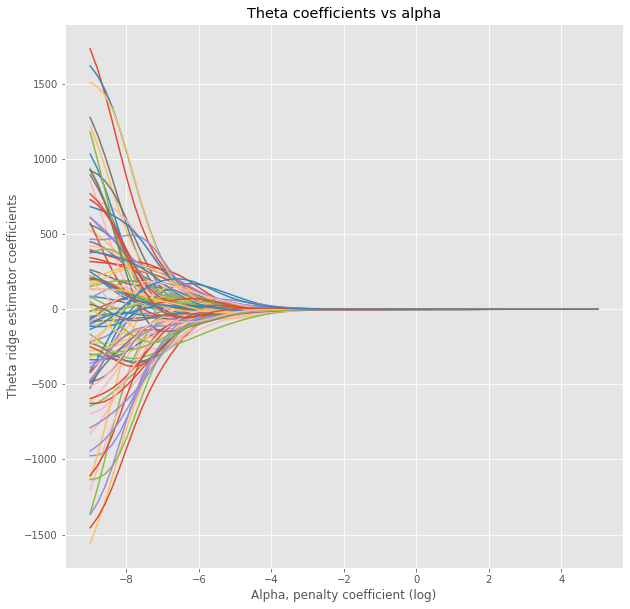

In [56]:
plt.figure(figsize=(10,10)) 
plt.plot(np.log10(alpha_list), ridge_list)
plt.xlabel('Alpha, penalty coefficient (log)')
plt.ylabel('Theta ridge estimator coefficients')
plt.title('Theta coefficients vs alpha')
plt.show()

## b) Plot how MSE of both the train and test sets change with alpha. Signal the minimum with a point

In [57]:
#We want to compute the MSE btw train and test sets

In [58]:
def MSE(Y_estim,Y):
    
    n = X.shape[0]
    p = X.shape[1]
    
    MSE = (np.linalg.norm((Y - Y_estim) ,2)**2)/n
    
    
    return MSE

In [59]:
def R_squared(X,Y, theta):
    
    r_squared = 1 - (np.linalg.norm((Y - X@theta),2)/np.linalg.norm(
    (Y - np.mean(Y)),2))**2
    
    return r_squared

Test set, with training on train set.

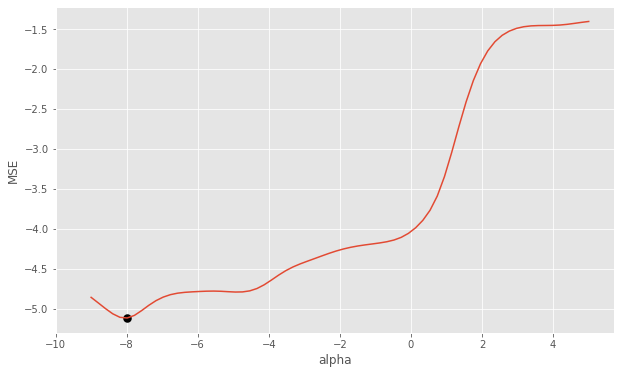

In [60]:
MSE_list = []

for alpha in alpha_list:
    
    MSE_list.append(MSE(X_test_scaled@ridge_(X_train_scaled,Y_train_scaled, alpha), Y_test_scaled))
    
R_squared_list = []

for alpha in alpha_list:
    
    R_squared_list.append(R_squared(X_test_scaled, Y_test_scaled, ridge_(X_train_scaled, Y_train_scaled, alpha)))
    
plt.figure(figsize = (10,6))
plt.plot(np.log10(alpha_list), np.log(MSE_list))
plt.xlim(left= -10)
plt.scatter(np.log10(alpha_list[np.argmin(MSE_list)]), np.log(np.min(MSE_list)), color= 'black', alpha = 1,linewidths = 2.5)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

In [61]:
best_alpha = alpha_list[np.argmin(MSE_list)]

## c) Store the R2 coefficient for the best performing value of alpha

In [62]:
#compute R_squared for best performing alpha
best_ridge = ridge_(X_train_scaled, Y_train_scaled, best_alpha)
r_squared_1 = 1 - (np.linalg.norm((Y_train_scaled - X_train_scaled@best_ridge),2)/np.linalg.norm(
    (Y_train_scaled - np.mean(Y_train_scaled)),2))**2
r_squared_2 = 1 - (np.linalg.norm((Y_test_scaled - X_test_scaled@best_ridge),2)/np.linalg.norm(
    (Y_test_scaled - np.mean(Y_test_scaled)),2))**2

In [63]:
r_squared_1

0.9950164589506281

In [64]:
df_r2.loc[3] = [r_squared_1 , r_squared_2]
df_r2.loc[:,2] = ['Regular OLS', 'Forward selection', 'SquentialFeatureSelector', 'Ridge' ]
df_r2

,0,1,2
0,0.995789,0.960055,Regular OLS
1,0.969415,0.955180,Forward selection
2,0.986747,0.938730,SquentialFeatureSelector
3,0.995016,0.976227,Ridge


# 6) LASSO

## a) Avoid warnings

In [65]:
clf = linear_model.Lasso(alpha=10**-5, max_iter= 2*10**5, tol = 2*10**-2)
clf.fit(X_train_scaled, Y_train_scaled)
clf.score(X_train_scaled, Y_train_scaled)

0.9564173083035963

In the cell above, we test sklearn's lasso and try to remove warnings. To do so, we increase max_iter
and tol: those warnings are caused by the non convergence of the gradient coordinate descent used to solve
the lasso problem. Indeed, if we raise the number of iterations, and increase the stopping criterion,
the descent will have more time to reach a less constraining epsilon, converging before max_iter is
reached and thus avoiding warnings.
The combination max_iter = $2*10**5$ and tol = $ 2* 10 **-2$ works to avoid warnings at alpha = $ 10**-5$

## b) Plot the number of coefficients that are different from 0 for each value of α.

In [66]:
alpha_list_2 = np.logspace(-5,-1, num= 70)
score = []
coefs_non_null = []
coefs_lasso = []
MSE_lasso = []

for alpha_2 in alpha_list_2:
    
    clf = linear_model.Lasso(alpha=alpha_2, max_iter= 2* 10**5, tol = 2*10**-2)
    clf.fit(X_train_scaled, Y_train_scaled)
    score.append(clf.score(X_test_scaled, Y_test_scaled))
    coefs = clf.coef_
    coefs_lasso.append(coefs)
    MSE_lasso.append(MSE(X_test_scaled@coefs,Y_test_scaled))
    
    c = 0
    for coef in coefs:
        if coef !=0:
            c += 1
    coefs_non_null.append(c)

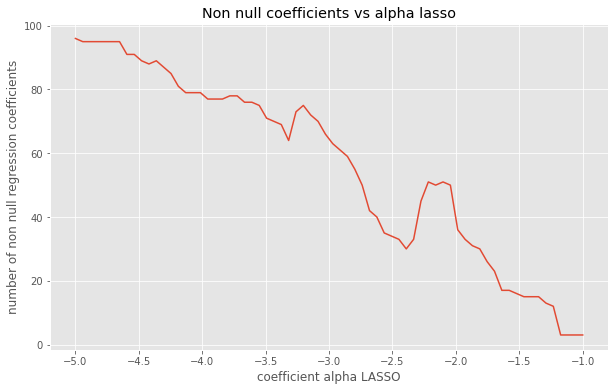

In [67]:
plt.figure(figsize=(10,6))
plt.plot(np.log10(alpha_list_2),coefs_non_null)
plt.ylabel('number of non null regression coefficients')
plt.xlabel('coefficient alpha LASSO')
plt.title('Non null coefficients vs alpha lasso')
plt.show()

## c) Plot how MSE of both the train and test sets change with α. Signal the minimum with a point.
 

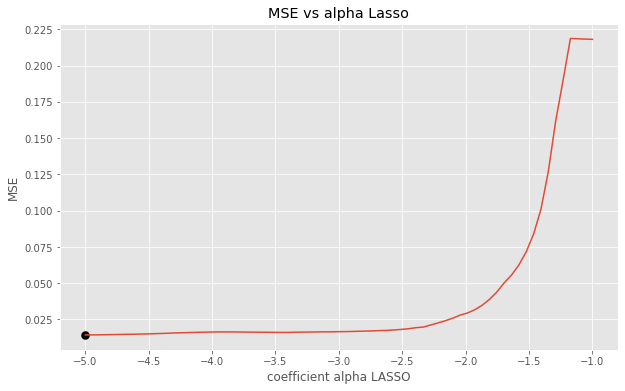

In [68]:
plt.figure(figsize=(10,6))
plt.plot(np.log10(alpha_list_2),MSE_lasso)
plt.scatter(np.log10(alpha_list_2[np.argmin(MSE_lasso)]),np.min(MSE_lasso), color= 'black', 
            alpha = 1,linewidths = 2.5)
plt.ylabel('MSE')
plt.xlabel('coefficient alpha LASSO')
plt.title('MSE vs alpha Lasso')
plt.show()

## d) Computing R2 coef

In [69]:
best_alpha_2 = alpha_list_2[np.argmin(MSE_lasso)]

In [70]:
clf = linear_model.Lasso(alpha= best_alpha_2, max_iter= 2*10**5, tol = 2*10**-2)
clf.fit(X_train_scaled, Y_train_scaled)
score_lasso_1 = clf.score(X_train_scaled, Y_train_scaled)
score_lasso_2 = clf.score(X_test_scaled, Y_test_scaled)
df_r2.loc[4] = [ score_lasso_1,score_lasso_2,'LASSO']
df_r2

,0,1,2
0,0.995789,0.960055,Regular OLS
1,0.969415,0.955180,Forward selection
2,0.986747,0.938730,SquentialFeatureSelector
3,0.995016,0.976227,Ridge
4,0.956417,0.943269,LASSO


# 7) Crossvalidation and elastic net

### Cross-validation implementation

In [71]:
def decomposition(a,b):

    if(a<b):

        return ERROR

    quotient = a//b
    rest = a%b

    dec = (a == (b - rest)*quotient + rest*(quotient + 1))
    return dec

In [72]:
# K = number of folds
def cross_validation(X,Y,K,alpha_ridge, alpha_lasso):

    X = X.copy()
    n = len(X)
    p = X.shape[1]
    small_size = n//K
    big_size = small_size +1
    rest = n%K
    complement = K - rest

    # split the X set into K folds: 2 parts, 1 of size K - rest, the other fo size rest. 
    #First part will have fold of size small_size, the latter big_size.

    fold_list_X = []
    fold_list_Y = []

    for i in range(rest):

        fold_x = X[i*big_size:(i+1)* big_size]
        fold_y = Y[i*big_size:(i+1)* big_size]

        fold_list_X.append(fold_x)
        fold_list_Y.append(fold_y)

    for i in range(K-rest):

        fold_x = X[(i+rest)*small_size:(i+1+rest)* small_size]
        fold_y = Y[(i+rest)*small_size:(i+1+rest)* small_size]

        if fold_x.any():

            fold_list_X.append(fold_x)
            fold_list_Y.append(fold_y)

    # both fold lists must have lengths of K, and are subsets of the dataset (X,Y)

    #cross validation loop
    error_list = []
    for k in range(K):
        
        test_X = fold_list_X[k]
        test_Y = fold_list_Y[k]

        train_X = fold_list_X.copy()
        train_X.pop(k)

        train_Y = fold_list_Y.copy()
        train_Y.pop(k)

        test_X = np.array(fold_list_X[k])
        test_Y = np.array(fold_list_Y[k])

        Y_train_array = np.array([])
        for y_train in train_Y:

            Y_train_array = np.append(Y_train_array,y_train)

        X_train_array = np.array([])
        for x_train in train_X:

            X_train_array = np.append(X_train_array,x_train)

        X_train_array = X_train_array.reshape(len(X_train_array)//p,p)

        elastic_k = linear_model.ElasticNet(alpha= alpha_ridge,l1_ratio= alpha_lasso, fit_intercept= False, max_iter = 10**5,
                                           tol= 8*10**-2)
        elastic_k.fit(X_train_array, Y_train_array)
        
        theta_k = elastic_k.coef_

        error_k = test_Y - test_X@theta_k
        error_list.append(error_k)

    risk = 0
    for error in error_list:

        risk += np.linalg.norm(error,2)**2

    return risk

In [ ]:
alpha_ridge_list = np.logspace(-10,3, num = 25)
alpha_lasso_list = [0,0.1,0.5,0.7,0.9,0.95,0.99]

risk_elastic_list = []

for i, alpha_ridge in enumerate(alpha_ridge_list):
    
    print(i)
    
    for alpha_lasso in alpha_lasso_list:
        
        risk_elastic_list.append(cross_validation(X_train_scaled,Y_train_scaled,5,alpha_ridge, alpha_lasso))

In [ ]:
np.argmin(risk_elastic_list)

# 8) Boostrap

In [74]:
# We'll use non centered data with only column 40 of X.
X_40 = df['V40'].values

In [75]:
reg_40 = LinearRegression(fit_intercept = True)
reg_40.fit(X_40.reshape(-1,1), Y)
a = reg_40.coef_
b =reg_40.intercept_

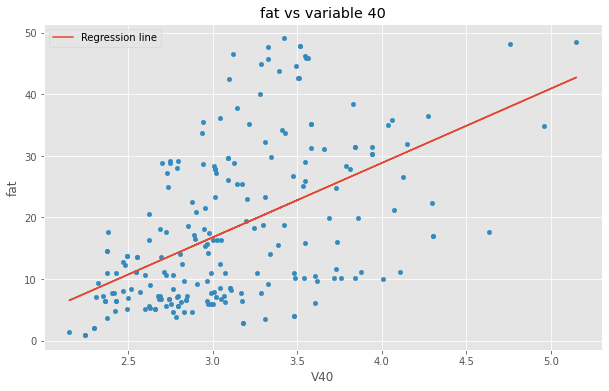

In [76]:
df.plot(kind = 'scatter',x ='V40' , y = 'fat', figsize =(10,6))
plt.plot(X_40, a*X_40 + b, label = 'Regression line')
plt.title('fat vs variable 40')
plt.legend()

Text(0.5, 0, 'V40')

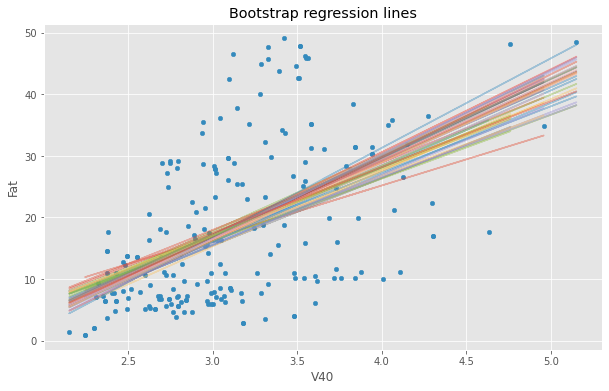

In [77]:
# Bootstrap regressions
df.plot(kind = 'scatter',x ='V40' , y = 'fat', figsize= (10,6))
for i in range(50):

    samples = np.random.randint(0, 215, 215)

    reg_temp = LinearRegression()
    reg_temp.fit(X_40[samples].reshape(-1,1), Y[samples])
    slope = reg_temp.coef_
    intercept = reg_temp.intercept_

    plt.plot(X_40[samples], slope*X_40[samples] +intercept, alpha = 0.4 )

plt.title('Bootstrap regression lines')
plt.ylabel('Fat')
plt.xlabel('V40')

In [78]:
def sum_of_squares(T,U):
    res = 0
    if len(T) == len(U):
        l = len(T)
        for i in range(l):
            res += (T[i] - U[i])**2
    return res

In [79]:
#Prediction intervals
alpha_PI = 10/100
def PI(const, slopee,x, y):

    p = 1
    N = x.shape[0]

    sigma_squared_estimator = (1/(N-2))*sum_of_squares(y, const + slopee*x)

    sup = const + slopee*x + stat.t.ppf(1-alpha_PI/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1+ 1/N + 
                                                                                                (x-x.mean())**2/(N*np.var(x))))

    inf = const + slopee*x - stat.t.ppf(1-alpha_PI/2, N-(p+1))*np.sqrt(sigma_squared_estimator*(1+ 1/N + 
                                                                                                (x-x.mean())**2/(N*np.var(x))))

    return [inf,sup]

Plot of prediction intervals

Text(0.5, 0, 'V40')

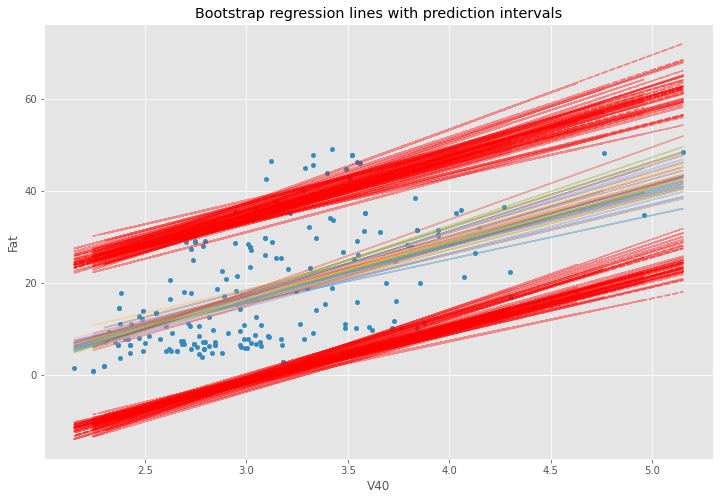

In [80]:
df.plot(kind = 'scatter',x ='V40' , y = 'fat', figsize = (12,8))
for i in range(50):

    samples = np.random.randint(0, 215, 215)

    reg_temp = LinearRegression()
    reg_temp.fit(X_40[samples].reshape(-1,1), Y[samples])
    slope = reg_temp.coef_
    intercept = reg_temp.intercept_

    plt.plot(X_40[samples], slope*X_40[samples] +intercept, alpha = 0.4 )
    plt.plot(X_40[samples], PI(intercept,slope, X_40[samples], Y[samples])[0],'r--',  alpha = 0.4)
    plt.plot(X_40[samples], PI(intercept,slope, X_40[samples], Y[samples])[1],'r--',  alpha = 0.4)

plt.title('Bootstrap regression lines with prediction intervals')
plt.ylabel('Fat')
plt.xlabel('V40')

# 9) PCA

In [81]:
n = X_train.shape[0]

In [82]:
X_transpose_X = X_train_scaled.T@X_train_scaled

In [83]:
cov_matrix = np.cov(X_train_scaled.T)

In [84]:
#SVD decomposition of X.T@X | COV(X) = X.T@X/n with standardized variables !!!!! X.T@X is symmetric so its SVD 
# is just the classic spectral decomposition given by the spectral theorem, U = V.T | s contains the eigenvalues of X.T@X

U, s, V = np.linalg.svd(X_transpose_X)

## a) Covariance matrix heatmap

<AxesSubplot:>

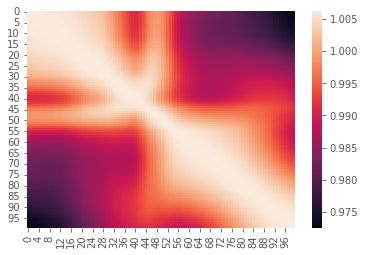

In [85]:
sb.heatmap(cov_matrix)

## b) PCA decomposition

In [86]:
#columns of U are eigenvectors of cov matrix, principal components projection = XU.

In [87]:
X_train_projected = X_train_scaled@U

## c) Amount of variance explained

In [88]:
p = X_train_scaled.shape[1]

In [89]:
variance_list = []
variancee_list = []

for k in range(1,p+1):
    
    variance = 0
    
    for i in range(k):
        
        variance += s[i]
        
    variance_list.append(variance/s.sum())
    variancee_list.append(s[k-1]/s.sum())

Text(0.5, 1.0, 'Amount of variance explained by the PCs')

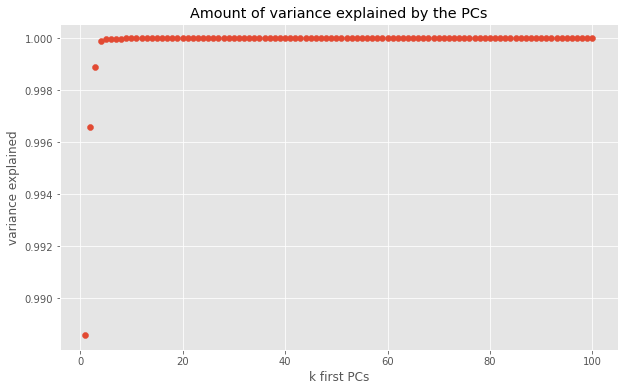

In [90]:
x = np.arange(1,p+1)
plt.figure(figsize = (10,6))
plt.scatter(x, variance_list)
#plt.bar(x, variancee_list)
plt.xlabel("k first PCs")
plt.ylabel("variance explained")
plt.title("Amount of variance explained by the PCs")

## d) Let us keep the 2 first PCs

In [91]:
PC_2s = U[:,0:2]

In [92]:
X_projected = X_train_scaled@PC_2s

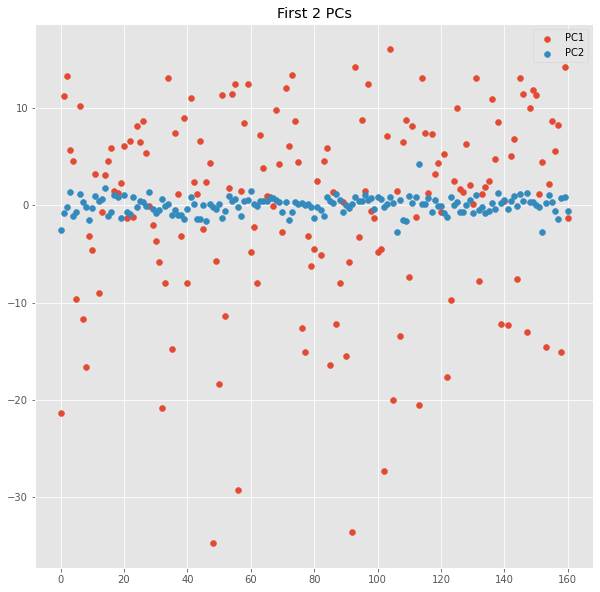

In [93]:
plt.figure(figsize = (10,10))
plt.scatter(np.arange(161), X_projected[:,0], label = 'PC1')
plt.scatter(np.arange(161),X_projected[:,1], label = 'PC2')
plt.title('First 2 PCs')
plt.legend()

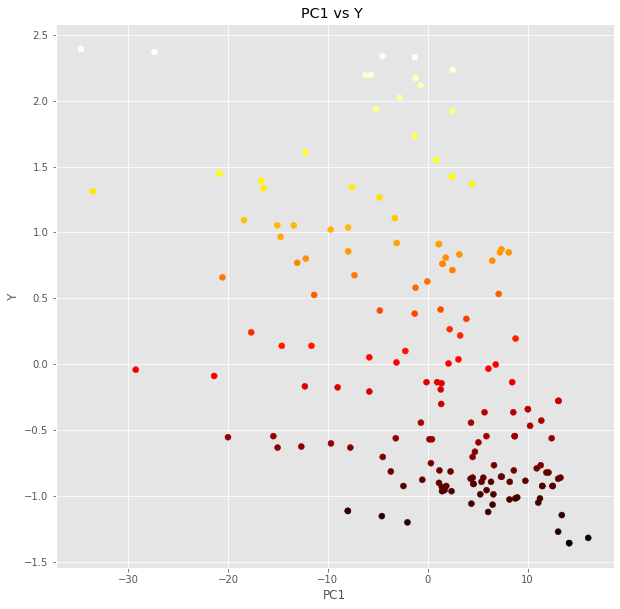

In [94]:
plt.figure(figsize = (10,10))
plt.scatter(X_projected[:,0], Y_train_scaled, c = Y_train_scaled, cmap = 'hot')
plt.title('PC1 vs Y ')
plt.xlabel('PC1')
plt.ylabel('Y')
plt.show()

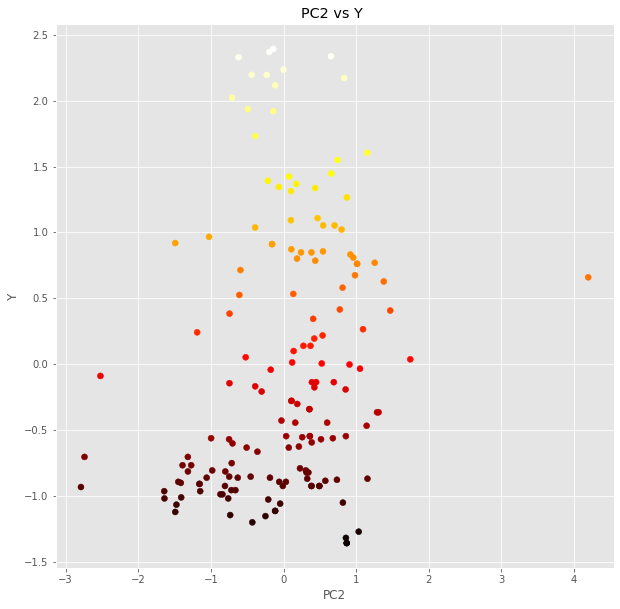

In [95]:
plt.figure(figsize = (10,10))
plt.scatter(X_projected[:,1], Y_train_scaled, c = Y_train_scaled, cmap = 'hot')
plt.title('PC2 vs Y ')
plt.xlabel('PC2')
plt.ylabel('Y')
plt.show()

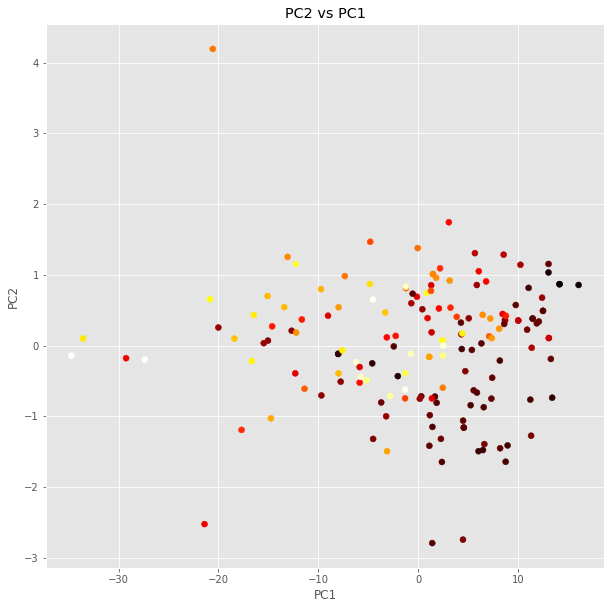

In [96]:
plt.figure(figsize = (10,10))
plt.scatter(X_projected[:,0], X_projected[:,1], c = Y_train_scaled, cmap = 'hot')
plt.title('PC2 vs PC1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can see that when PC1 has high values and PC2 low ones, Y tend to be negative.

## e) OLS

In [97]:
X_test_projected = X_test_scaled@U 

TRAIN

In [98]:
scores = []

for k in range(1,p):
    
    
    reg_k = LinearRegression()
    reg_k.fit(X_train_projected[:,0:k+1], Y_train_scaled)
    scores.append(reg_k.score(X_train_projected[:,0:k+1], Y_train_scaled))

Text(0, 0.5, 'R2 score')

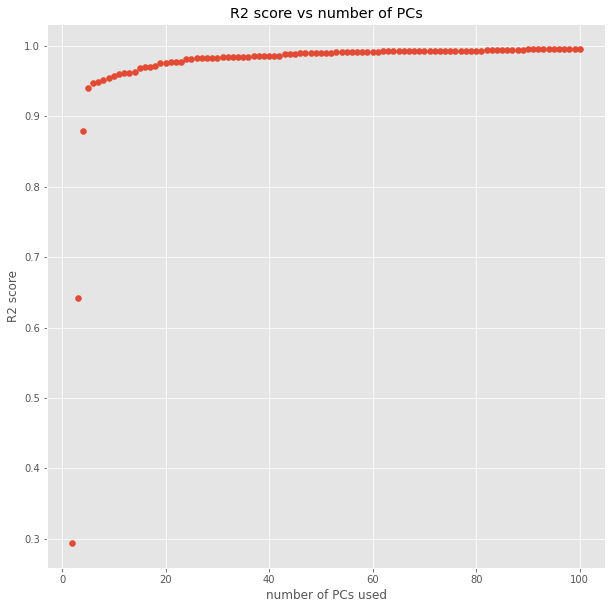

In [99]:
plt.figure(figsize = (10,10))
plt.scatter(np.arange(2,p+1), scores)
plt.title('R2 score vs number of PCs')
plt.xlabel('number of PCs used')
plt.ylabel("R2 score")

TEST

Text(0, 0.5, 'R2 score')

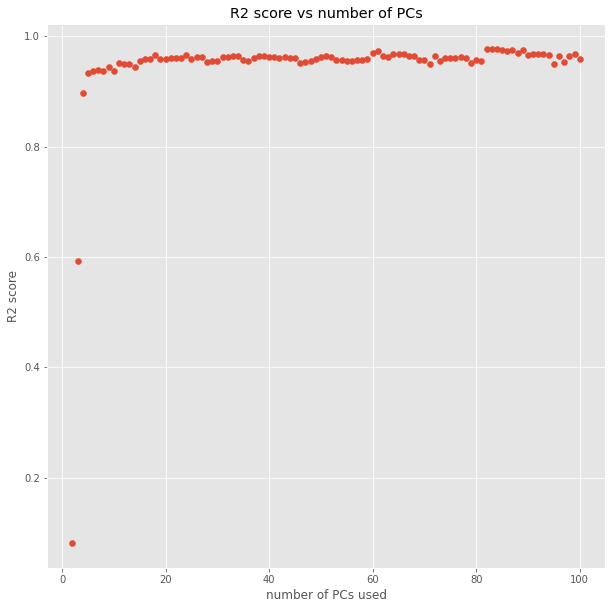

In [100]:
scores_2 = []

for k in range(1,p):
    
    
    reg_k = LinearRegression()
    reg_k.fit(X_train_projected[:,0:k+1], Y_train_scaled)
    scores_2.append(reg_k.score(X_test_projected[:,0:k+1], Y_test_scaled))
    
plt.figure(figsize = (10,10))
plt.scatter(np.arange(2,p+1), scores_2)
plt.title('R2 score vs number of PCs')
plt.xlabel('number of PCs used')
plt.ylabel("R2 score")

In [101]:
r_squared_pca = np.max(scores)

In [102]:
r_squared_pca_2 = np.max(scores_2)

In [103]:
df_r2_final = df_r2.copy()
df_r2_final = df_r2_final.reindex(columns= [2,0,1])
#df_r2.loc[5] = ['Full PCA',np.max(scores)]

In [104]:
df_r2_final = df_r2_final.rename(columns = {2: "OLS variant", 0: "R2 score train", 1: "R2 score test"})

In [105]:
df_r2_final.loc[5] = ['PCA',r_squared_pca, r_squared_pca_2]

In [106]:
#NO loss of information with PCA: same R2 as with the full regression

# 10) Results summary

In [107]:
df_r2_final

,OLS variant,R2 score train,R2 score test
0,Regular OLS,0.995789,0.960055
1,Forward selection,0.969415,0.955180
2,SquentialFeatureSelector,0.986747,0.938730
3,Ridge,0.995016,0.976227
4,LASSO,0.956417,0.943269
5,PCA,0.995789,0.977460


Looking at the table above, we can say several things. When training, PCA and regular OLS have the same 
best results (R2 = 0.996), with the Ridge coming close behind (0.995). 
However, what is really interesting is the models behaviours with the test set, in order to detect any risk of overfitting. 
Now, regular OLS is no longer the best ("only" 0.96), overperformed by the Ridge (0.976) and the PCA method (0.977). 
Further is the forward selection I implemeted following the course's algorithm (0.955), the one implemented by sklearn (0.939) 
and the LASSO (0.943). This shows that there was a bit of overfitting concerning the regular OLS model, who
was very well performing during training but much less when testing. Ridge and PCA were still good for testing, hence
they seem to be the best OLS variants for that problem. Finally, we might be disappointed by the scores of forward
selection and LASSO, but lets not forget that contrary to the other  models, they reduced the number of
covariates in order to simplify the model. Thus, we cannot judge them only on the R2 score criterion, because those
methods are useful to select the most important feature to predict Y and give us a much clearer approach,
even though there is a bit of loss in regression accuracy.

# Annex

### MSE version 2

In [ ]:
def var(X,Y, alpha):
    
    n = X.shape[0]
    p = X.shape[1]
    
    var = np.std(Y)**2*np.linalg.inv(X.T@X + n*alpha*np.identity(p))@X.T@X@np.linalg.inv((X.T@X + n*alpha*np.identity(p)))
    
    return var

In [ ]:
def bias(Y, Y_pred):
    
    bias = (1/n)*np.sum((Y-Y_pred))
    
    return bias

In [ ]:
def MSE_2(X,Y,alpha):
    
    MSE = var(X,Y,alpha) + (bias(Y, X@ridge(X,Y, alpha)))**2
    
    return MSE

TRAIN

In [ ]:
MSE_list_2 = []

for alpha in alpha_list:
    
    MSE_list_2.append(MSE(X_train_scaled@ridge_(X_train_scaled,Y_train_scaled, alpha), Y_train_scaled))

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(np.log10(alpha_list), MSE_list_2)
plt.show()

TEST

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize MSE array
mse = []

# Loop through alpha values
for a in alpha_list:
    # Create and fit Ridge model
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, Y_train_scaled)
    # Compute and store MSE
    mse.append(mean_squared_error(Y_train_scaled, model.predict(X_train_scaled))) #+ np.linalg.norm(a*))

# Plot MSE vs alpha
plt.figure(figsize=(10,6))
plt.plot(alpha_list, mse)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = []
ridge = Ridge()

for lambda_ in alpha_list:
    ridge.set_params(alpha=lambda_)
    scores.append(np.mean(cross_val_score(ridge, X_train_scaled, Y_train_scaled, cv=5)))

# Find the lambda value that gives the highest cross-validation score
best_lambda = alpha_list[np.argmax(scores)]

In [ ]:
best_lambda

In [ ]:
#alpha_list

In [ ]:
np.argmin(MSE_list)

In [ ]:
#best_alpha

### MSE version 3 

In [ ]:
variance = []
bias_squared = []
for i,ridge_val in enumerate(ridge_list):
    
    #print(ridge_val.shape)
    #print(i)
    #print(ridge_(X_train_scaled, Y_train_scaled, alpha_list[i]) == ridge_val)
    variance.append(np.std(np.array(ridge_val))**2)
    bias_squared.append((np.linalg.norm((Y_train_scaled - X_train_scaled@np.array(ridge_val) ) ,2)).mean())

In [ ]:
r_squared = []

1 - (np.linalg.norm((Y_train_scaled - X_train_scaled@best_ridge),2)/np.linalg.norm(
    (Y_train_scaled - np.mean(Y_train_scaled)),2))**2

TRAIN

In [ ]:
msee = []

for i in range(len(bias_squared)):
    
    msee.append(bias_squared[i]**2 + variance[i])

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.log10(alpha_list),np.log(msee))
plt.ylabel('un mse t as peur')
plt.xlabel('coefficient alpha')
plt.title('MSE vs alpha for train set, log scales')
plt.show()

In [ ]:
alpha_list[np.argmin(msee)]

In [ ]:
best_alpha = alpha_list[np.argmin(msee)]

TEST

In [ ]:
variance = []
bias_squared = []
for i,ridge_val in enumerate(ridge_list):
    
    #print(ridge_val.shape)
    #print(i)
    variance.append(np.std(np.array(ridge_val))**2)
    bias_squared.append((np.linalg.norm((Y_test_scaled - X_test_scaled@ridge_(X_test_scaled, 
                                                                              Y_test_scaled, alpha_list[i]) ) ,2)).mean())

    
    msee = []

for i in range(len(bias_squared)):
    
    msee.append(bias_squared[i]**2 + variance[i])

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(np.log10(alpha_list[np.argmin(msee)]), np.log(msee[np.argmin(msee)]), color= 'r', alpha = 1,linewidths = 2.5)
plt.plot(np.log10(alpha_list),np.log(msee))
plt.ylabel('un mse t as peur')
plt.xlabel('coefficient alpha')
plt.title('MSE vs alpha for test set, log scales')
plt.show()

In [ ]:
alpha_list[np.argmin(msee)]

In [ ]:
best_alpha

In [ ]:
best_ridge = ridge_(X_train_scaled,Y_train_scaled, best_alpha)

### lasso

In [ ]:

#evolution of coefficients vs alpha lasso
plt.figure(figsize=(10,6))
plt.plot(np.log10(alpha_list_2),coefs_lasso)
plt.ylabel('regression coeffcients')
plt.xlabel('coefficient alpha LASSO')
plt.title('look')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.log10(alpha_list_2),score)
plt.ylabel('r2 regression score')
plt.xlabel('coefficient alpha LASSO')
plt.xlim(left=-5.2)
plt.title('R2 vs alpha')
plt.show()

In [ ]:
plt.figure(figsize = (10,10))
plt.bar(x, variancee_list)
plt.title("Amount of variance explained by each PC")

In [ ]:
plt.figure(figsize = (10,10))

for k in range(p):
    
        plt.scatter(X_train_scaled[:,k],Y_train_scaled)

In [ ]:
plt.figure(figsize = (10,10))

for k in range(p):
    
        plt.scatter(X_train_projected[:,k],Y_train_scaled)